In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
import networkx as nx
import seaborn as sns

## 5.1 [10%]

Let's denote $\langle k \rangle$ by $\eta$

Since $P(k) = \frac{e^\eta \eta^k}{k!}$ is a probability function, we know that $\sum_{k=0}^\infty \frac{e^\eta \eta^k}{k!} = \sum_{k=0}^\infty P(k) =1$

$$ E(k) = \sum_{k=0}^\infty k P(k) = \sum_{k=0}^\infty \frac{ke^\eta \eta^k}{k!} = 0 + \sum_{k=1}^\infty \frac{ke^\eta \eta^k}{k!} = \sum_{k=1}^\infty \frac{e^\eta \eta^k}{(k-1)!} =\eta \sum_{k=1}^\infty \frac{e^\eta \eta^{k-1}}{(k-1)!} =\eta \sum_{k=0}^\infty \frac{e^\eta \eta^{k}}{k!} =\eta \sum_{k=0}^\infty P(k) = \eta $$

$$ E(k^2) = \sum_{k=0}^\infty k^2 P(k) = \sum_{k=0}^\infty \frac{ (k^2 - k )e^\eta \eta^k}{k!}  + \sum_{k=0}^\infty \frac{ k e^\eta \eta^k}{k!}  =\sum_{k=0}^\infty \frac{ (k^2 - k )e^\eta \eta^k}{k!}  + \eta  = 0 + 0 + \sum_{k=2}^\infty \frac{ (k^2 - k )e^\eta \eta^k}{k!} +\eta = \sum_{k=2}^\infty \frac{e^\eta \eta^k}{(k-2)!} +\eta =  $$

$$ \eta^2\sum_{k=2}^\infty \frac{e^\eta \eta^{k-2}}{(k-2)!} +\eta = \eta^2\sum_{k=0}^\infty \frac{e^\eta \eta^{k}}{k!} +\eta =  \eta^2\sum_{k=0}^\infty P(k) +\eta = \eta^2 + \eta$$

$$ Var(k) = E(k^2) - (E(k))^2 = \eta = \langle k \rangle$$

## 5.2 [20%]

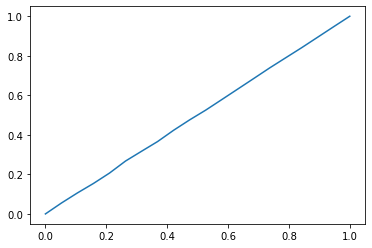

In [2]:
N = 100
def clust_coef_simulation_ER(p: float, M=10) -> float:
    """For a given probabilty p, generates M Erdos Renyi graphs and computes the average of their average clustering coefficent"""
    result = 0
    for _ in range(M):
        G = nx.generators.erdos_renyi_graph(N, p)
        result += nx.average_clustering(G)
    return result/M

X = np.linspace(0, 1, 20)
Y = np.array([clust_coef_simulation_ER(p) for p in X])
plt.plot(X, Y)


In [3]:
max(abs(X.reshape(-1)-Y.reshape(-1)))

0.00427574142649606

## 5.3 [40%]

<AxesSubplot:>

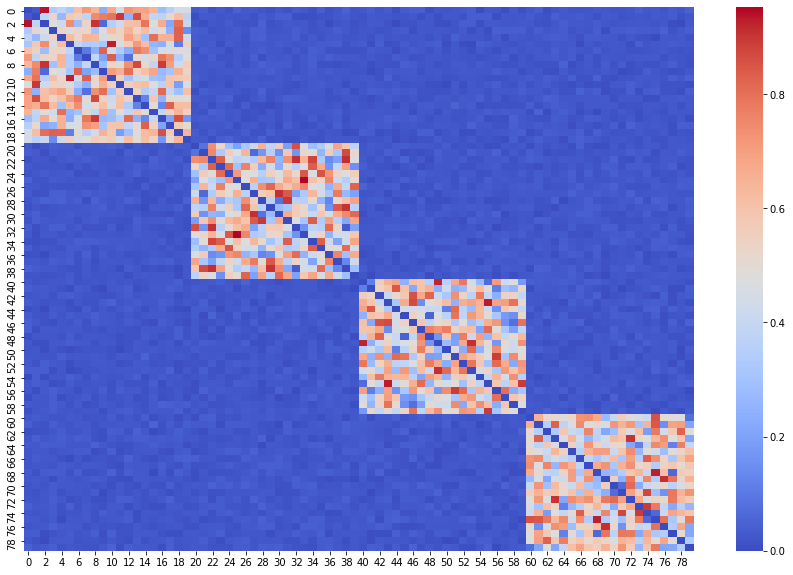

In [4]:
N=20 
Q=4
communities = [np.random.rand(N, N) for _ in range(Q)] # four random matrices with values between 0 and 1 
between = np.random.rand(N*Q, N*Q)* 0.05 # random matrix with values between 0 and 0.05
for i in range(Q):
    between[i*N:(i+1)*N, i*N:(i+1)*N] = communities[i]
# to make the matrix symmetric
probability_matrix = (between + between.transpose())/2
np.fill_diagonal(probability_matrix, 0)
sns.heatmap(probability_matrix, cmap='coolwarm', ax=plt.subplots(figsize=(15,10))[1]) # probability matrix 

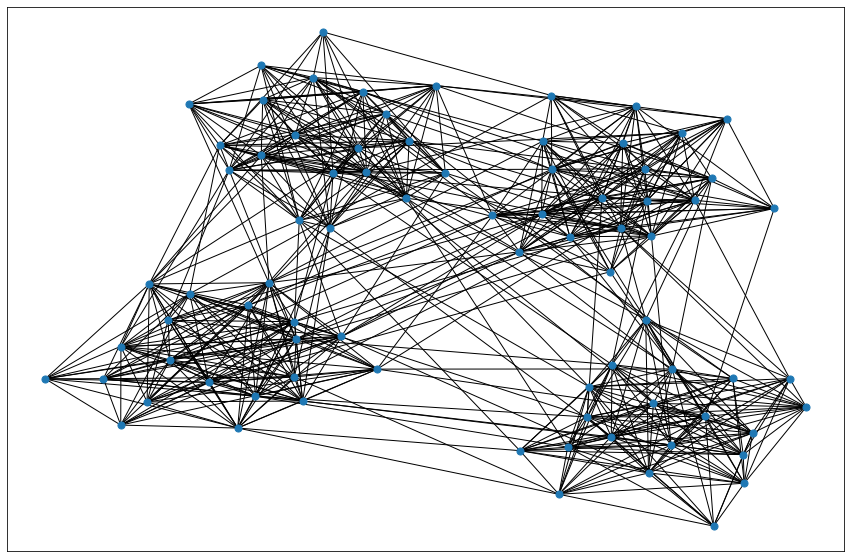

In [5]:
adjacency = probability_matrix > np.random.rand(N*Q, N*Q)  
G = nx.convert_matrix.from_numpy_array(adjacency)
nx.draw_networkx(G, nx.spring_layout(G, iterations=10000), with_labels=False, node_size=50,ax=plt.subplots(figsize=(15,10))[1])

## 5.4 [30%]

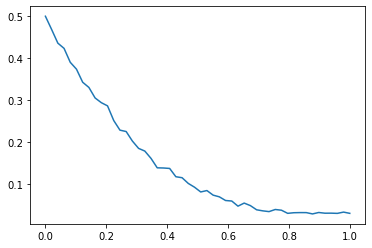

In [6]:
N = 100
def clust_coef_simulation_WS(p: float, M=30, k=4) -> float:
    """For a given probabilty p, generates M Watts Strogatz graphs and computes the average of their clustering coefficent"""
    result = 0
    for _ in range(M):
        G = nx.generators.random_graphs.connected_watts_strogatz_graph(N, k, p)
        result += nx.average_clustering(G)
    return result/M

X = np.linspace(0,1,50)
Y = [clust_coef_simulation_WS(p) for p in X]
plt.plot(X, Y)